In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import t
%matplotlib inline

In [2]:
def ci(sample, gamma=0.95):
    x_mean = np.mean(sample)
    S_biased = np.mean((sample - x_mean) ** 2)
    n = sample.shape[0]
    
    t1 = t(n - 1).ppf((1 - gamma) / 2)
    t2 = t(n - 1).ppf((1 + gamma) / 2)
    
    return [x_mean - S_biased * t2 / np.sqrt(n - 1),
            x_mean - S_biased * t1 / np.sqrt(n - 1)]

In [3]:
def generate_sample(mean, std, n):
    sample = np.random.normal(mean, std, n)
    return sample

In [4]:
def plot_ci(mean, std, p=0.95):
    plt.figure(figsize=(10, 7))
    for n in range(3, 200):
        s = generate_sample(mean, std, n)
        plt.plot([n, n], ci(s, p))
        
    plt.xlabel('Размер выборки')
    plt.ylabel('Доверительный интервал уровня доверия {}'.format(p))
    plt.show()

Для выборки из $\mathcal{N}(2, 1)$ мощностью от 2 до 200 был сгенерирован доверительный интервал уровня доверия 0.95 для оценки математического ожидания при неизвестной дисперсии. На графике отображен полученный доверительный для выборки каждого размера.

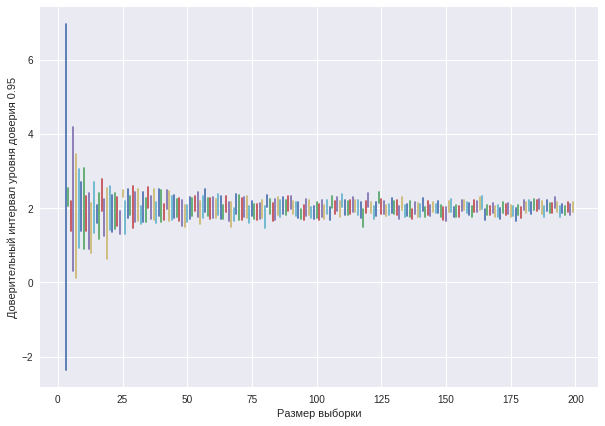

In [5]:
plot_ci(2, 1)

In [6]:
def generate_length_distr(n, mean, std, k=100, p=0.95):
    len_list = []
    for _ in range(k):
        a, b = ci(generate_sample(mean, std, n), p)
        len_list.append(b - a)
    return len_list
    

In [7]:
def show_length_dist(mean, std, k=100, p=0.95):
    n2 = generate_length_distr(2, mean, std, k, p)
    n3 = generate_length_distr(3, mean, std, k, p)
    n4 = generate_length_distr(4, mean, std, k, p)
    n5 = generate_length_distr(5, mean, std, k, p)
    
    plt.figure(figsize=(10, 10))
    plt.subplot(221)
    plt.hist(n2, bins=np.arange(min(n2), max(n2) + 1))
    plt.title('Гистограмма распределения длинн \nдоверительного интервала для среднего при n=2')
    plt.subplot(222)
    plt.hist(n3, bins=np.arange(min(n3), max(n3) + 1))
    plt.title('Гистограмма распределения длинн \nдоверительного интервала для среднего при n=3')
    plt.subplot(223)
    plt.hist(n4, bins=np.arange(min(n4), max(n4) + 1))
    plt.title('Гистограмма распределения длинн \nдоверительного интервала для среднего при n=4')
    plt.subplot(224)
    plt.hist(n5, bins=np.arange(min(n5), max(n5) + 1))
    plt.title('Гистограмма распределения длинн \nдоверительного интервала для среднего при n=5')
    plt.show()

Из следующих графиков видно, почему при малых мощностях выборки доверительный интервал не имеет смысла: его длины с ненулевой вероятностью могут принимать очень большие значения, в то время как уже начиная с мощности 4 длина доверительного интервала колеблется в приемлимых пределах

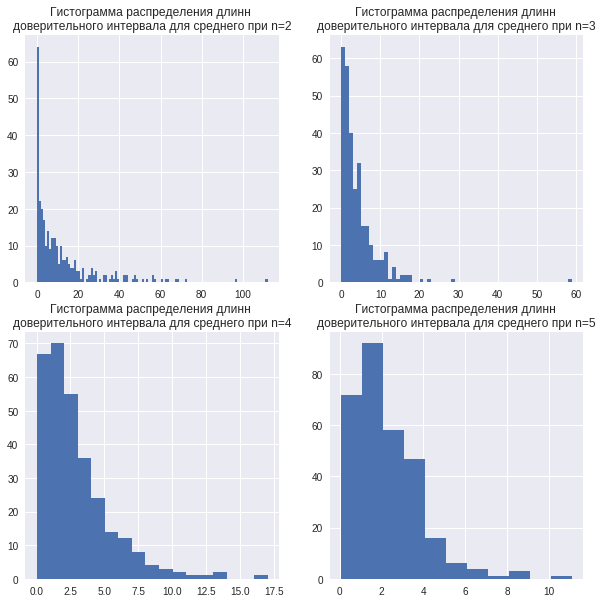

In [8]:
show_length_dist(2, 1, 300)